In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline

In [2]:
mydataFrame = pd.read_csv("paul-newfood.csv")

In [3]:
mydataFrame.head()

,Sales,PriceLevel,AdLevel,StoreSize
0,620,1,1,34
1,774,1,1,41
2,955,1,2,32
3,669,1,2,28
4,623,1,1,34


In [4]:
mydataFrame.describe()

,Sales,PriceLevel,AdLevel,StoreSize
count,24.000000,24.000000,24.000000,24.000000
mean,571.416667,2.000000,1.500000,32.333333
std,212.629279,0.834058,0.510754,6.424590
min,294.000000,1.000000,1.000000,19.000000
25%,393.250000,1.000000,1.000000,28.750000
50%,550.000000,2.000000,1.500000,32.000000
75%,677.000000,3.000000,2.000000,37.000000
max,1208.000000,3.000000,2.000000,43.000000


In [5]:
mydataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
Sales         24 non-null int64
PriceLevel    24 non-null int64
AdLevel       24 non-null int64
StoreSize     24 non-null int64
dtypes: int64(4)
memory usage: 832.0 bytes


In [6]:
mydataFrame.PriceLevel = pd.Categorical(mydataFrame.PriceLevel)

In [10]:
mydataFrame.PriceLevel.value_counts

<bound method IndexOpsMixin.value_counts of 0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     2
9     2
10    2
11    2
12    2
13    2
14    2
15    2
16    3
17    3
18    3
19    3
20    3
21    3
22    3
23    3
Name: PriceLevel, dtype: category
Categories (3, int64): [1, 2, 3]>

In [8]:
mydataFrame.AdLevel = pd.Categorical(mydataFrame.AdLevel)

In [11]:
mydataFrame.AdLevel.value_counts

<bound method IndexOpsMixin.value_counts of 0     1
1     1
2     2
3     2
4     1
5     1
6     2
7     2
8     1
9     1
10    2
11    2
12    1
13    1
14    2
15    2
16    1
17    1
18    2
19    2
20    1
21    1
22    2
23    2
Name: AdLevel, dtype: category
Categories (2, int64): [1, 2]>

In [13]:
formula = 'Sales ~ C(PriceLevel) + C(AdLevel)'
model = ols(formula,mydataFrame).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df         sum_sq        mean_sq          F    PR(>F)
C(PriceLevel)   2.0  600412.583333  300206.291667  13.663982  0.000182
C(AdLevel)      1.0      32.666667      32.666667   0.001487  0.969624
Residual       20.0  439412.583333   21970.629167        NaN       NaN


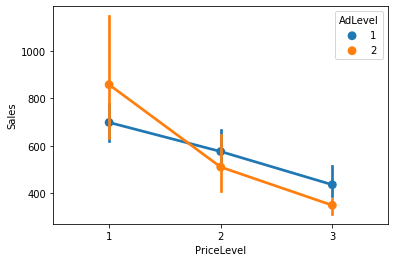

In [16]:
sns.pointplot(x='PriceLevel', y='Sales', data=mydataFrame, hue='AdLevel')

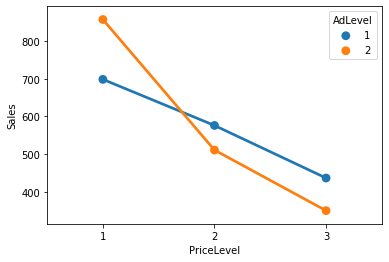

In [17]:
sns.pointplot(x='PriceLevel', y='Sales', data=mydataFrame, hue='AdLevel', ci=None)

In [18]:
formula = 'Sales ~ C(PriceLevel) + C(AdLevel)+ C(PriceLevel) : C(AdLevel)'
model = ols(formula,mydataFrame).fit()
aov_table = anova_lm(model)
print(aov_table)

                            df         sum_sq        mean_sq          F  \
C(PriceLevel)              2.0  600412.583333  300206.291667  14.781913   
C(AdLevel)                 1.0      32.666667      32.666667   0.001608   
C(PriceLevel):C(AdLevel)   2.0   73850.083333   36925.041667   1.818159   
Residual                  18.0  365562.500000   20309.027778        NaN   

                            PR(>F)  
C(PriceLevel)             0.000159  
C(AdLevel)                0.968450  
C(PriceLevel):C(AdLevel)  0.190898  
Residual                       NaN  
